# Why Deep Learning?

This chapter motivates the need for deep learning methods.

![](../graphics/artwork/computer_vision.png)

## Preamble

In [1]:
import ai_dojo
ai_dojo.setup_plot_style(dark=True)

## Features make machine learning possible

This is the very well-known **Iris** dataset. For many different iris flowers observed in the wild, it lists measurements of the their dimensions (**features**) as well as their exact species (**class**).

![](graphics/iris-data.png)

_Image credits: Principal Component Analysis by Sebastian Raschka_


In [2]:
iris_data = ai_dojo.datasets.read_iris()

In [3]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
import seaborn

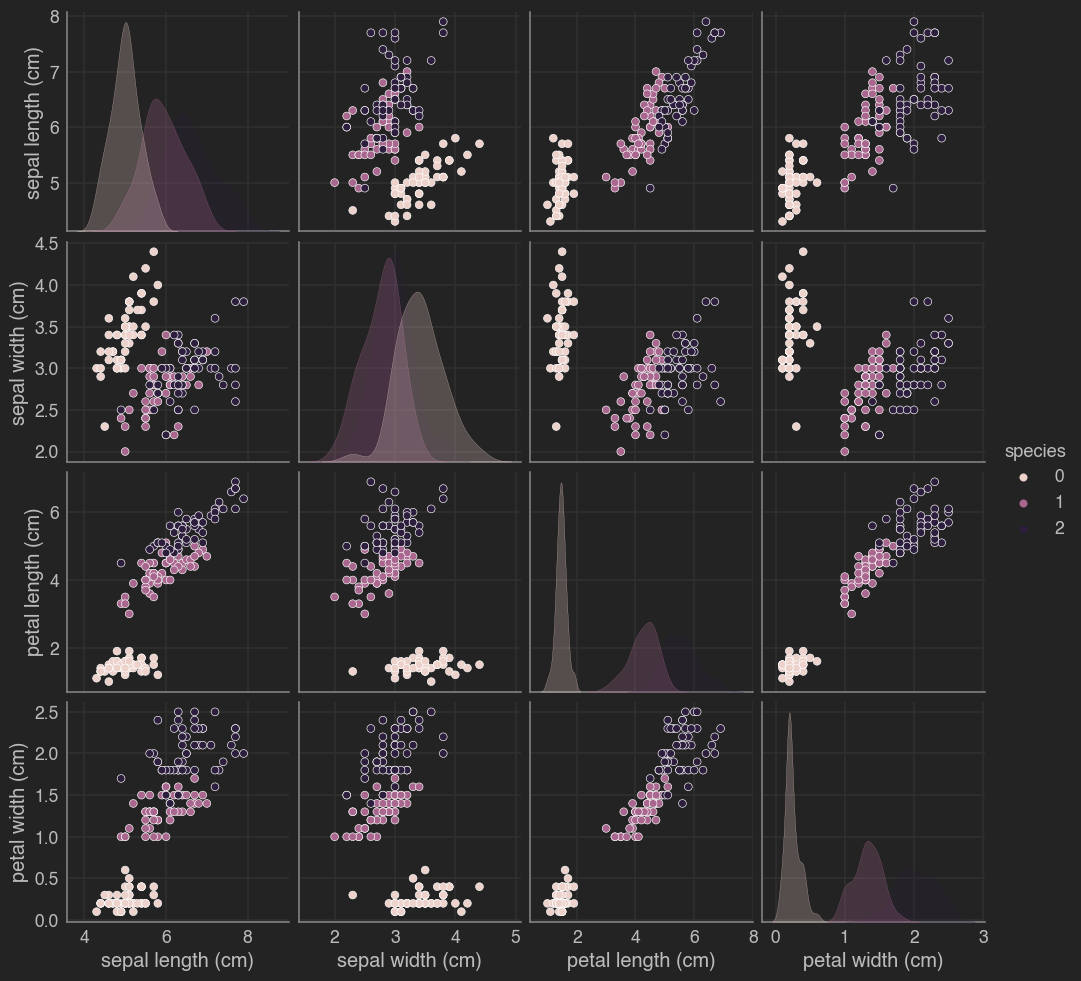

In [5]:
seaborn.pairplot(
    iris_data,
    vars=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"],
    hue="species"
)

## Feature Engineering


> Coming up with features is difficult, time-consuming, requires expert knowledge. "Applied machine learning" is basically feature engineering.

— Andrew Ng, ML researcher, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf)

Good features are not always so easily accessible - they may hide in the messy raw data. **Feature engineering is the process of mining the data for good features.** It requires an understanding the data to create features that make machine learning algorithms work.



### Example: Feature Engineering for Titanic Survival Model

In [6]:
import pandas

In [7]:
data_path = "../.assets/data/titanic/titanic.csv"

In [8]:
titanic_data = pandas.read_csv(data_path)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
!cat ../.assets/data/titanic/titanic-documentation.txt

Data Dictionary

Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	    Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	    Sex 	
Age 	    Age in years 	
sibsp 	    # of siblings / spouses aboard the Titanic 	
parch 	    # of parents / children aboard the Titanic 	
ticket 	    Ticket number 	
fare 	    Passenger fare 	
cabin 	    Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton


Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for t

#### Feature Idea: Cabins and Decks

This is an example of using some more domain knowledge to come up with a feature: We notice that we have a cabin number for some of the passengers on the list:

In [10]:
titanic_data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Do you notice a pattern? The cabin number starts with a letter. What could that mean? Let's have a look at the blueprints:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Titanic_cutaway_diagram.png/515px-Titanic_cutaway_diagram.png) 
*cutaway diagram of the RNS Titanic - Source: Wikimedia Commons*

As we see, the letters refer to the ship's decks, from top to bottom. This gives us a promising hypothesis: Perhaps your chances of survival in the disaster depend on the placement of your cabin in the ship. We should test this hypothesis by deriving the deck as a new feature from the cabin number and providing it to our model.

#### Exercise: Cabins and Decks

Derive the deck as a feature from the cabin number!

In [11]:
# TODO: your code here 



## High-dimensional Input Data: Where are the Features?

Machine learning on tabular data is the most common use case in industry data science projects. But what about machine learning on other types of data - time series, images, audio, video? They have one thing in common: Each item is a very high-dimensional data point. 

Imagine trying to classify objects in a photo on the basis of the raw measurements - the RGB values of each pixel. Surely we need some clever **featurization** before we can think about tackling this problem with ML.

![](https://www.codeproject.com/KB/cpp/1196024/classification_cat_dog.JPG)

###  Example: Handwriting Recognition

The [MNIST](https://en.m.wikipedia.org/wiki/MNIST_database) dataset is a famous benchmark for handwriting recognition performance. The task is to recognize a handwritten digit from a small grayscale image, i.e. classification with 10 classes.

In [12]:
from tensorflow import keras
import numpy

In [13]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
numpy.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [16]:
n_classes = 10

In [17]:
import matplotlib.pyplot as plt

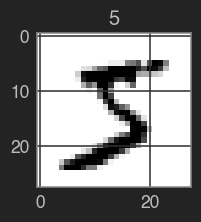

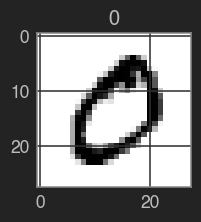

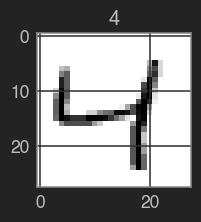

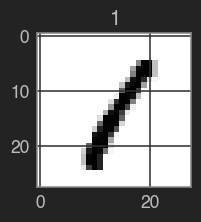

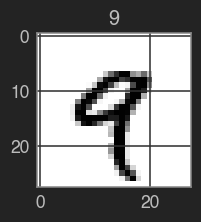

In [18]:
for i in range(5):
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[i], cmap="binary")
    plt.title(y_train[i])
    plt.show()

### A (not yet deep) Network for Handwriting Recognition 

As a preprocessing step before training, the grayscale pixel data is scaled to the interval $[0,1]$:

In [19]:
X_train, X_test = X_train / 255.0, X_test / 255.0


Here is the complete workflow for neural network construction, training and classifying:

In [20]:
net = keras.models.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation="relu"),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(n_classes, activation="softmax")
])
net.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
net.fit(
    X_train, 
    y_train, 
    epochs=10, 
)
y_pred = numpy.argmax(net.predict(X_test), axis=-1)

Epoch 1/10


2022-11-06 14:47:30.387107: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 2s 995us/step - loss: 0.2921 - accuracy: 0.9149
Epoch 2/10
1875/1875 [==============================] - 2s 1000us/step - loss: 0.1418 - accuracy: 0.9574
Epoch 3/10
1875/1875 [==============================] - 2s 911us/step - loss: 0.1083 - accuracy: 0.9671
Epoch 4/10
1875/1875 [==============================] - 2s 911us/step - loss: 0.0886 - accuracy: 0.9726
Epoch 5/10
1875/1875 [==============================] - 2s 959us/step - loss: 0.0755 - accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 2s 922us/step - loss: 0.0656 - accuracy: 0.9798
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0586 - accuracy: 0.9820
Epoch 8/10
1875/1875 [==============================] - 2s 971us/step - loss: 0.0528 - accuracy: 0.9834
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0483 - accuracy: 0.9841
Epoch 10/10
313/313 [==============================] - 0s 508us/step


If you prefer a graphical summary - this one was made with the [Netron](https://github.com/lutzroeder/netron) application:

![](graphics/MNIST_classifier.svg)

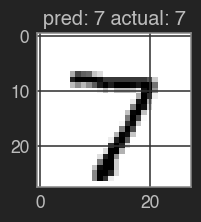

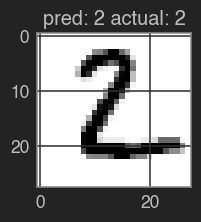

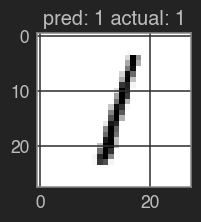

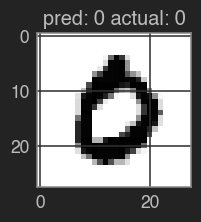

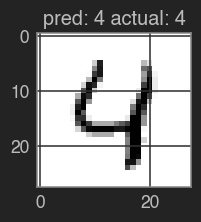

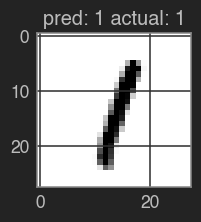

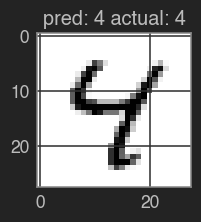

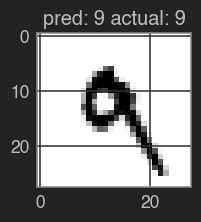

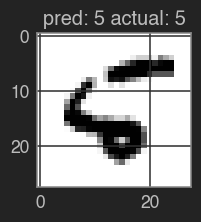

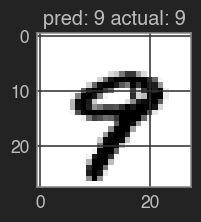

In [21]:
for i in range(10):
    plt.figure(figsize=(2,2))
    plt.imshow(X_test[i], cmap="binary")
    plt.title(f"pred: {y_pred[i]} actual: {y_test[i]}")

## Deep Learning = Automated Feature Engineering

A neural network can **learn to extract relevant features from complex inputs**. _Adding more layers_ can enable it to perform this task better - this is _putting the "deep" in "deep learning"_.  Each layer in the front part of the network acts as a _feature extractor_.


![](graphics/convnet_architecture.jpg)

_[Source](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)_ 

![](graphics/cnn_feature_viz.jpg)

[_Source_](https://www.researchgate.net/publication/319622441_DeepFeat_A_Bottom_Up_and_Top_Down_Saliency_Model_Based_on_Deep_Features_of_Convolutional_Neural_Nets/figures?lo=1)

---
_This notebook is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/). Copyright © 2018-2021 [Point 8 GmbH](https://point-8.de)_